In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Reading Data
data = pd.read_csv(r'https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/datasets/headsize.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Manual Calculation

In [4]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [6]:
# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


In [7]:
np.linspace(-100, 100, 10)

array([-100.        ,  -77.77777778,  -55.55555556,  -33.33333333,
        -11.11111111,   11.11111111,   33.33333333,   55.55555556,
         77.77777778,  100.        ])

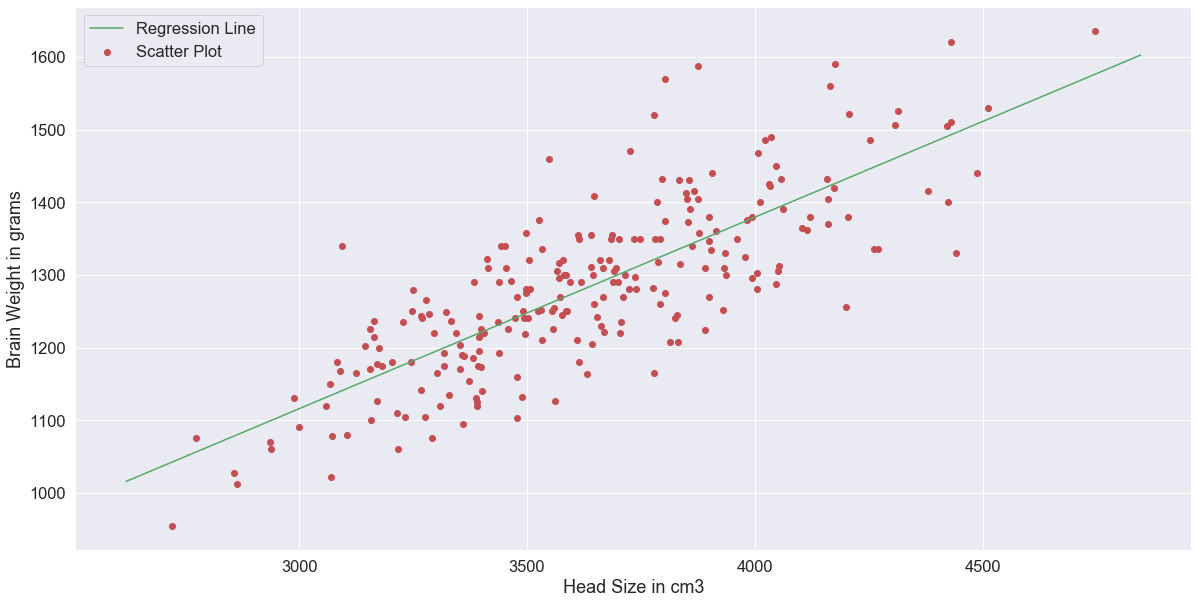

In [8]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Scatter Points
plt.scatter(X, Y, c='r', label='Scatter Plot')

# Ploting Line (regression line)
plt.plot(x, y, color='g', label='Regression Line')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [12]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)

print(rmse)

72.1206213783709


# Calculation Using SKLearn

In [13]:
X = X.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)

In [14]:
reg.coef_

array([0.26342934])

In [15]:
reg.intercept_

325.5734210494428

In [25]:
Y_pred = b0 + b1 * X

rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2   = reg.score(X, Y)
print("RMSE", end=' ')
print(rmse)
print("R2 Score", end=' ')
print(r2)

RMSE 72.1206213783709
R2 Score 0.639311719957


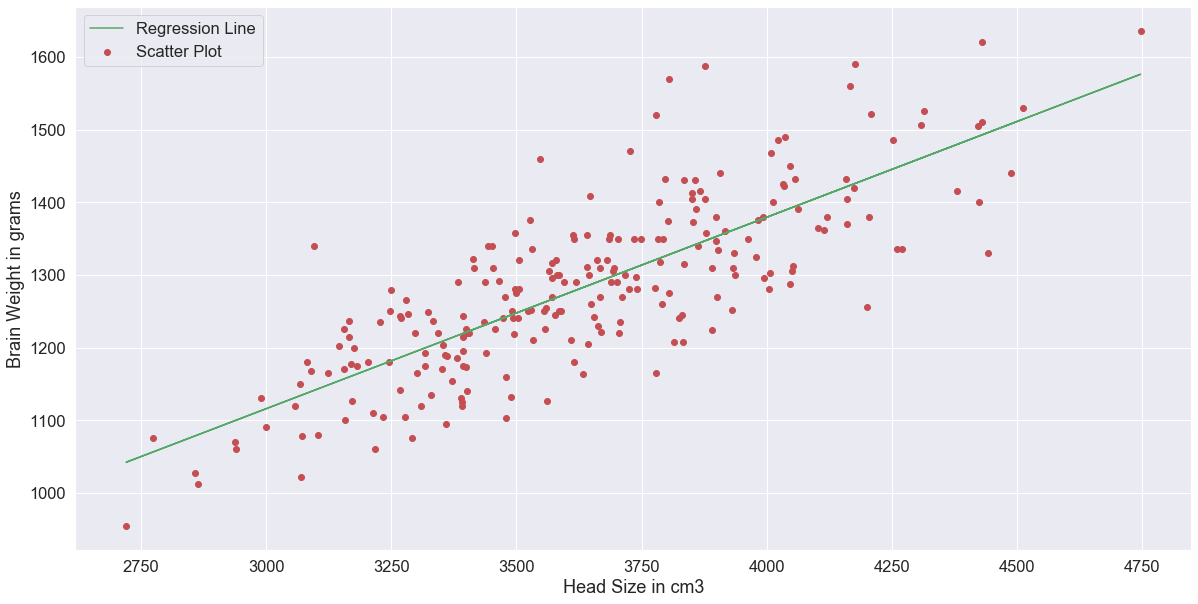

In [21]:
y1=reg.predict(X)

# Ploting Scatter Points
plt.scatter(X, Y, c='r', label='Scatter Plot')

# Ploting Line (regression line)
plt.plot(X, y1, color='g', label='Regression Line')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()